In [3]:
import scipy.datasets

#load the ascent image
ascent_image = scipy.datasets.ascent()
ascent_image.shape

(512, 512)

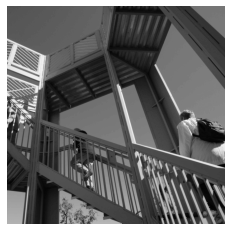

In [4]:
import matplotlib.pyplot as plt

#visualize the image
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

In [7]:
import numpy as np

#copy the image to a numpy array
image_tranformed = np.copy(ascent_image)

#get the dimension of the image
size_x = image_tranformed.shape[0]
size_y = image_tranformed.shape[1]

print(size_y)

512


create the filter with array 3x3

In [25]:
# Experiment with different values and see the effect
# filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
# filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

Now you can create a convolution. You will iterate over the image, leaving a 1 pixel margin, and multiplying each of the neighbors of the current pixel by the value defined in the filter (i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter, etc.)

You'll then multiply the result by the weight, and then ensure the result is in the range 0-255.

Finally you'll load the new value into the transformed image.

In [26]:
#iterte over the image
for x in range(1, size_x -1):
    for y in range(1, size_y - 1):
        convolution = 0.0
        convolution = convolution + (ascent_image[x-1][y-1] * filter[0][0])
        convolution = convolution + (ascent_image[x-1][y] * filter[0][1])
        convolution = convolution + (ascent_image[x-1][y+1] * filter[0][2])
        convolution = convolution + (ascent_image[x][y-1] * filter[1][1])
        convolution = convolution + (ascent_image[x][y] * filter[1][1])
        convolution = convolution + (ascent_image[x][y+1] * filter[1][2])
        convolution = convolution + (ascent_image[x+1][y-1] * filter[2][0])
        convolution = convolution + (ascent_image[x+1][y] * filter[2][1])
        convolution = convolution + (ascent_image[x+1][y+1] * filter[2][2])

        #multiple by weight
        convolution = convolution * weight

        #check the boudary of pixels
        if(convolution < 0):
            convolution = 0
        if(convolution > 255):
            convolution = 255

        #load image transformed
        image_tranformed[x, y] = convolution

the effect of convolution

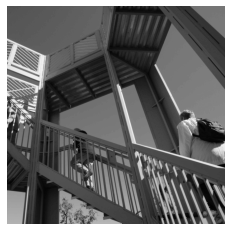

In [23]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

# Effect of the max pooling
    The next cell will show a (2, 2) pooling. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. It will take the largest of them and load it into the new image. Thus, the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. 

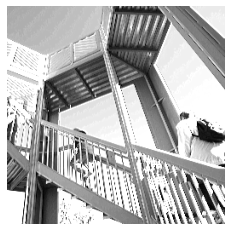

In [27]:
#assign new dimensions half of the sign of the original dimensions
new_x = int(size_x/2)
new_y = int(size_y/2)

#create blank image with reduced dimensions
new_image = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):

        #stored all pixels values in 
        pixels = []
        pixels.append(image_tranformed[x,y])
        pixels.append(image_tranformed[x+1, y])
        pixels.append(image_tranformed[x,y+1])
        pixels.append(image_tranformed[x+1, y+1])

        #get only the largest value and assigned to reduce image
        new_image[int(x/2),int(y/2)] = max(pixels)

#plot the image
plt.grid(False)
plt.gray
plt.axis('off')
plt.imshow(new_image)
plt.show()